In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df = pd.read_json("oameni_greutati_inaltimi.json")
df.head(2)

,Greutate,Inaltime,Voce_Subtire
Alina,60,165,True
Bogdan,72,183,False


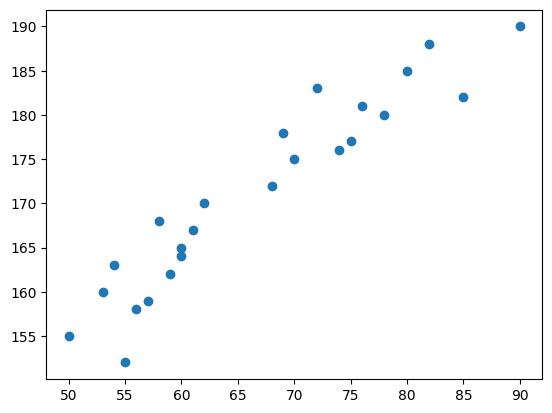

In [68]:
plt.scatter(df["Greutate"], df["Inaltime"]);

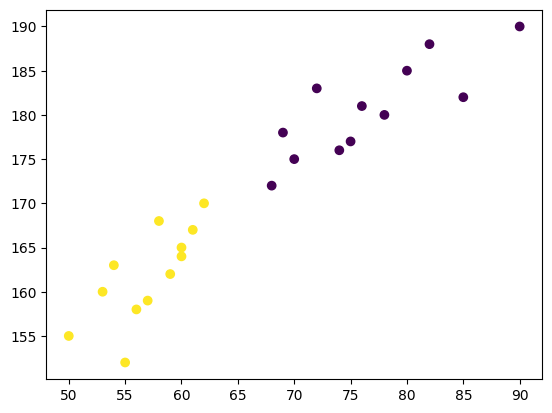

In [69]:
plt.scatter(df["Greutate"], df["Inaltime"], c=df["Voce_Subtire"]);

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
scaler

,copy,True
,with_mean,True
,with_std,True


In [72]:
numpy_df = scaler.fit_transform(df)
type(numpy_df)

numpy.ndarray

In [73]:
df.keys()

Index(['Greutate', 'Inaltime', 'Voce_Subtire'], dtype='object')

In [74]:
scaled_df = pd.DataFrame(numpy_df, columns=['Greutate', 'Inaltime', 'Voce_Subtire'])
scaled_df.head(2)

,Greutate,Inaltime,Voce_Subtire
0,-0.619155,-0.586600,1.0
1,0.468141,1.102808,-1.0


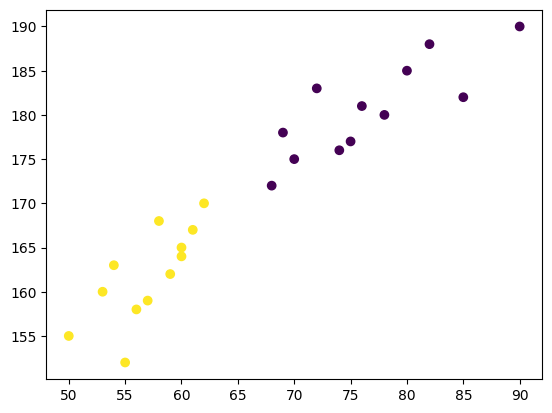

In [75]:
plt.scatter(df["Greutate"], df["Inaltime"], c=df["Voce_Subtire"]);


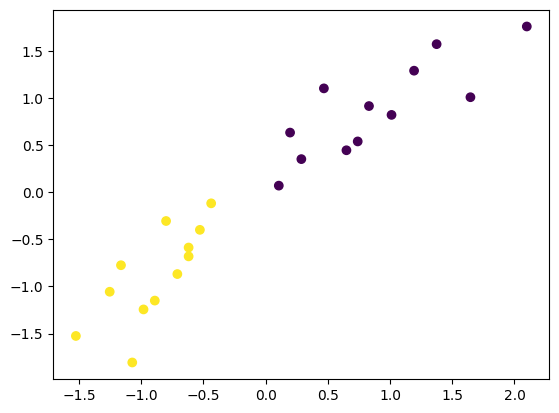

In [76]:
plt.scatter(scaled_df["Greutate"], scaled_df["Inaltime"], c=scaled_df["Voce_Subtire"]);

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
model = DecisionTreeClassifier()
model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [79]:
x = scaled_df
y = df["Voce_Subtire"]

In [80]:
y[:3]

Alina       True
Bogdan     False
Ciprian    False
Name: Voce_Subtire, dtype: bool

In [81]:
model.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [82]:
model.predict([[64, 166, True]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([False])

# pip install graphviz

In [83]:
import graphviz
from sklearn.tree import export_graphviz

In [84]:
exported_data = export_graphviz(model, feature_names=['Greutate', 'Inaltime', 'Voce_Subtire'], class_names=["male", "female"])
exported_data

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Greutate <= -0.166\\ngini = 0.5\\nsamples = 24\\nvalue = [12, 12]\\nclass = male"] ;\n1 [label="gini = 0.0\\nsamples = 12\\nvalue = [0, 12]\\nclass = female"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 12\\nvalue = [12, 0]\\nclass = male"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [85]:
exported_graph = graphviz.Source(exported_data)

In [86]:
exported_graph.render("Barbati vs Femei", format="png")
exported_graph.view()

'Barbati vs Femei.pdf'